In [83]:
import numpy as np
import matplotlib.pyplot as plt

def f1(x):
    Q = np.array([[48, 12], [8, 8]])
    q = np.array([[13], [23]])
    p = 4
    f1_x = 0.5 * np.matmul(np.transpose(x), np.matmul(Q, x)) + np.matmul(np.transpose(q), x) + p
    return f1_x[0, 0]

# Initial parameters
x0_1 = np.array([23, 37])
Q = np.array([[48, 12], [8, 8]])

def f2(x):
    n = len(x)
    a = -2
    b = 150
    result = 0
    for i in range(n-1):
        term1 = b * (x[i+1]**2 - x[i])**2
        term2 = (x[i] - a)**2
        result += term1 + term2
    return result
#initial parameters
n = 2

x0_2 = np.array([1, 2])


def gradient(f, x, input_size):
    h = 1e-10
    grad = np.zeros((input_size, 1))
    for i in range(input_size):
        delta = np.zeros((input_size, 1))
        delta[i][0] = h
        grad[i][0] = (f(x + delta) - f(x)) / h
    return grad

def gradient_descent_constant(f , x0,max_iter, tol,c):
    x = x0.reshape(-1, 1)
    input_size = len(x)
    val = np.zeros(max_iter)
    val[0] = f(x)

    x_history = [x.flatten()]

    print("Iteration\tX Value\t\t\t\tFunction Value")
    print(f"0\t\t{x.flatten()}\t\t{val[0]}")

    for k in range(1, max_iter):
        # Using a constant step size (alpha)
        step = c /np.linalg.norm(gradient(f, x, input_size))
        x = x - step * gradient(f, x, input_size)
        val[k] = f(x)

        x_history.append(x.flatten())

        print(f"{k}\t\t{x.flatten()}\t{val[k]}")

        # Check for convergence
        if np.linalg.norm(gradient(f, x, input_size)) < tol:
            break

    return x, val[:k+1], np.array(x_history)

Iteration	X Value				Function Value
0		[23 37]		27836.0
1		[19.24762695 35.61446887]	21893.161054324322
2		[15.5172554  34.17074864]	16743.41929463561
3		[11.81713234 32.65117985]	12382.901973048416
4		[ 8.16097028 31.02868826]	8805.546908741328
5		[ 4.57398428 29.25850989]	6001.040741199755
6		[ 1.10878642 27.26040983]	3949.6889260353296
7		[-2.10007547 24.87227136]	2606.7919287800114
8		[-4.60011338 21.74980271]	1844.009110469833
9		[-4.85642209 17.75802293]	1314.3220575622547
10		[-3.48474026 14.00056515]	868.3332950187246
11		[-2.92087989 10.04050688]	511.69313106679226
12		[-1.56086863  6.27880921]	246.28259790661778
13		[-1.62101799  2.27926148]	82.24745675200909
14		[1.81563685 0.23245824]	116.50345556404073
15		[-1.87259222 -1.31575568]	65.11594960180315
16		[ 2.11780013 -1.03868359]	97.60174823181347
17		[-1.66465229 -2.33985757]	55.89863618089342
18		[ 2.29836591 -1.79719118]	90.93657479152908
19		[-1.53292629 -2.94662587]	52.59629432337431
20		[ 2.40612074 -2.25099054]	88.55

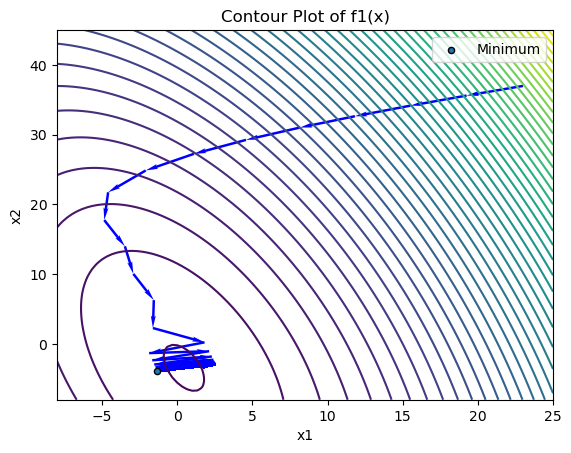

the minimum value with the given condtraints and conditions is:
50.74973643212712


In [115]:

#########
# should be fixed
#########


def plot_contour(Q, q, p, x_vals, y_vals, levels=None):
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = 0.5 * (Q[0, 0] * X**2 + (Q[1, 0] + Q[0, 1]) * X * Y + Q[1, 1] * Y**2) + q[0] * X + q[1] * Y + p

    plt.contour(X, Y, Z, levels=levels)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Contour Plot of f1(x)')



# Define range for contour plot
x_v = np.linspace(-8, 25, 100)
y_v = np.linspace(-8, 45, 100)
c=4

plot_contour(Q, np.array([[13], [23]]), 4, x_v, y_v, levels=50)
minimizer_f1, values_f1, x_history_f1 = gradient_descent_constant(f1 ,x0_1, 1000, 1e-10,c)
plt.quiver(x_history_f1[:-1, 0], x_history_f1[:-1, 1], x_history_f1[1:, 0] - x_history_f1[:-1, 0], x_history_f1[1:, 1] - x_history_f1[:-1, 1],
           scale_units='xy', angles='xy', scale=1, color='blue', width=0.005, headwidth=2)
plt.scatter(minimizer_f1[0], minimizer_f1[1], s=20, label='Minimum', edgecolors='black')
plt.legend()

plt.show()

print("the minimum value with the given condtraints and conditions is:")
print(np.min(values_f1))

Iteration	X Value				Function Value
0		[1 2]		1359.0
1		[1.02410127 1.9029478 ]	1020.8915198788219
2		[1.04932903 1.80618231]	743.8808660586036
3		[1.07578047 1.70974414]	521.418132311829
4		[1.10356165 1.61368059]	347.3136445661046
5		[1.13278543 1.51804602]	215.7388456599943
6		[1.16356492 1.42290075]	121.22737478963813
7		[1.19599152 1.32830415]	58.67621413720579
8		[1.23005562 1.23428481]	23.346089686586687
9		[1.26519767 1.14066303]	10.854993393815766
10		[1.28221191 1.04212109]	16.54681932847734
11		[1.23515535 1.13035759]	10.73784281611367
12		[1.25646836 1.0326552 ]	16.02480827439271
13		[1.2089885  1.12066465]	10.62755934309418
14		[1.23256937 1.0234847 ]	15.585943408020588
15		[1.18468648 1.11127553]	10.520939313670919
16		[1.20983343 1.014489  ]	15.19794981535809
17		[1.16155808 1.10206463]	10.416614569247752
18		[1.18791488 1.00560055]	14.84530294897198
19		[1.1392526  1.09296176]	10.313833090203872
20		[1.16660616 0.99677558]	14.519060159029856
21		[1.11755936 1.08392149]	

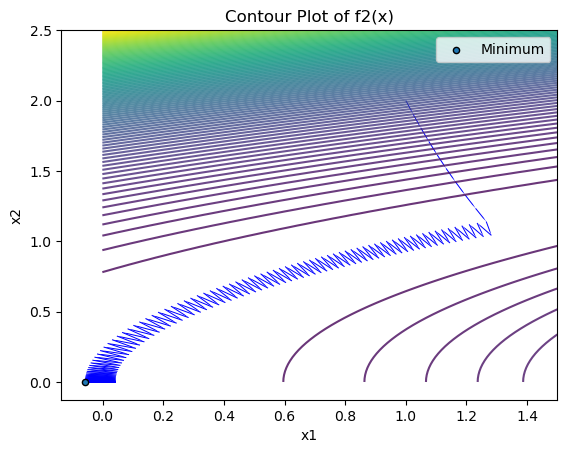

the minimum value with the given condtraints and conditions is:
4.277586806179899


In [113]:
def plot_contour(a, b, x_vals, y_vals, levels=None):
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = np.zeros_like(X)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            x = np.array([X[i, j], Y[i, j]])
            Z[i, j] = f2(x)

    plt.contour(X, Y, Z, levels=levels, cmap='viridis', alpha=0.8)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Contour Plot of f2(x)')

# Example usage:
a_value = 2
b_value = 150
c = 0.1
x_vals = np.linspace(-0.001, 1.5, 100)
y_vals = np.linspace(0.001, 2.5, 100)

plot_contour(a_value, b_value, x_vals, y_vals, levels=100)
minimizer_f2, values_f2, x_history_f2 = gradient_descent_constant(f2 ,x0_2, 300, 1e-10,c)
plt.quiver(x_history_f2[:-1, 0], x_history_f2[:-1, 1], x_history_f2[1:, 0] - x_history_f2[:-1, 0], x_history_f2[1:, 1] - x_history_f2[:-1, 1],
           scale_units='xy', angles='xy', scale=1, color='blue', width=0.002, headwidth=1)
plt.scatter(minimizer_f2[0], minimizer_f2[1], s=20, label='Minimum', edgecolors='black')
plt.legend()

plt.show()

print("the minimum value with the given condtraints and conditions is:")
print(np.min(values_f2))